In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from operator import itemgetter

In [11]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [12]:
def barplot_nodes(graph,centrality, centrality_name):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    fig.suptitle(centrality_name + ' Centrality barplot and nodes highlights')

    #barplot
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    plt.figure(figsize=(15,10))
    sns.barplot(x=x, y=y, ax=ax1)


    #ottenimento dei colori
    col = []
    x_values = ax1.get_xticklabels()
    x_values = [x.get_text() for x in x_values]
    for i in range(0, len(ax1.patches)):
        colori = []
        colori = list(ax1.patches[i].get_facecolor())
        colori.append(int(x_values[i]))
        col.append(colori)
    
    dizionario_colori = {}
    for colori in col:
        color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
        dizionario_colori.update({colori[4]: color_HEX})
    print(dizionario_colori)



    #aggiunta nodi colorati in base al barplot
    plt.figure(figsize=(12,8))
    pos_sample = nx.spring_layout(graph)
    nx.draw(graph, pos_sample, ax=ax2, with_labels = False)
    nx.draw_networkx_nodes(graph, pos_sample, ax=ax2, nodelist=list(dizionario_colori.keys()), node_color=list(dizionario_colori.values()))
    plt.show()

    return dizionario_colori

In [13]:
def important_node_centrality_plot(centrality, df_edge, dizionario_colori):
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    
    nodes = labels
    edges = []

    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))

    graph_deg = nx.DiGraph()
    graph_deg.add_edges_from(edges)
    graph_deg.add_nodes_from(nodes)
    pos_deg = nx.spring_layout(graph_deg)

    plt.figure(figsize=(12,8))
    nx.draw(graph_deg, pos_deg, node_size=1000, nodelist=list(dizionario_colori.keys()), with_labels = False, node_color=list(dizionario_colori.values())) 
    nx.draw_networkx_labels(graph_deg, pos_deg, labels)
    plt.show()

In [14]:
df_edge = pd.read_csv('twitch\ENGB\musae_ENGB_edges.csv')
df_target = pd.read_csv('twitch\ENGB\musae_ENGB_target.csv')

In [15]:
df_target = df_target[df_target.partner.eq(True)]
df_target = df_target[df_target.mature.eq(False)]

In [16]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [17]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [18]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  235
EDGES:  1279
DENSITY:  0.023
CLUSTERING:  0.1491802288039979


In [19]:
nx.clustering(graph)

{11: 0.09722222222222222,
 2867: 0.09722222222222222,
 4500: 0.05844155844155844,
 2234: 0.19583333333333333,
 5264: 0.13333333333333333,
 8630: 0.12878787878787878,
 5834: 0.08187134502923976,
 8753: 0.10756302521008404,
 5208: 0.2,
 7127: 0.12894736842105264,
 27: 0.17032967032967034,
 8700: 0.09879032258064516,
 4538: 0.11576354679802955,
 2064: 0.125,
 617: 0.14814814814814814,
 5358: 0.18333333333333332,
 189: 0.1987179487179487,
 8723: 0.10822510822510822,
 7208: 0.14682539682539683,
 7398: 0.15612648221343872,
 4918: 0.14285714285714285,
 6418: 0.155,
 1642: 0.11995967741935484,
 128: 0.125,
 3617: 0.1,
 7913: 0.055443548387096774,
 8614: 0.0757918552036199,
 8425: 0.1,
 3363: 0.0661764705882353,
 7521: 0.07516339869281045,
 5706: 0.16666666666666666,
 7720: 0.07516339869281045,
 4042: 0.13,
 266: 0.11904761904761904,
 8174: 0.30357142857142855,
 7525: 0.19090909090909092,
 3023: 0.12878787878787878,
 2498: 0.06382978723404255,
 4121: 0.15,
 8013: 0.28888888888888886,
 7280: 0.1

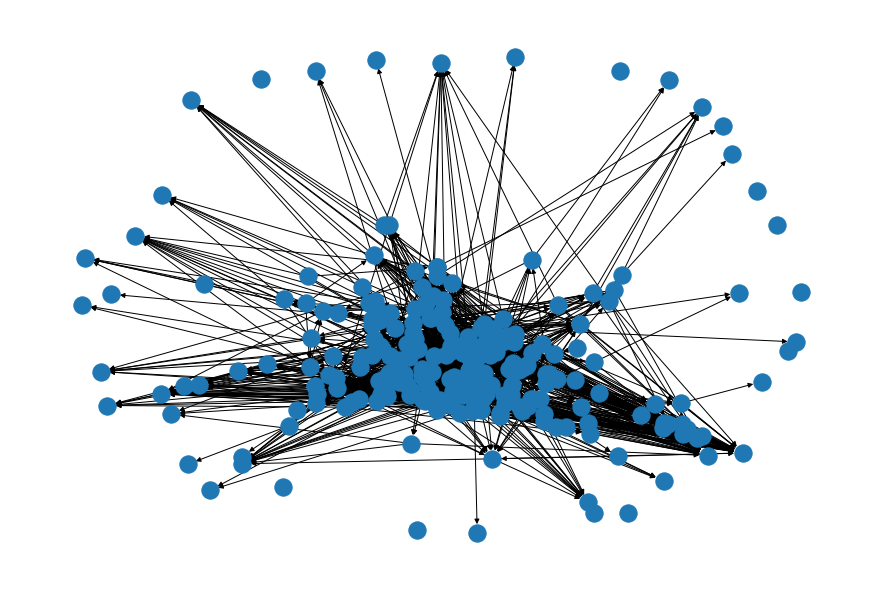

In [20]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1080x720 with 0 Axes>

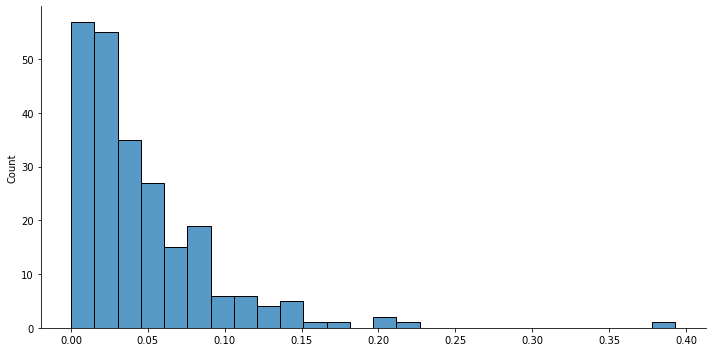

In [21]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

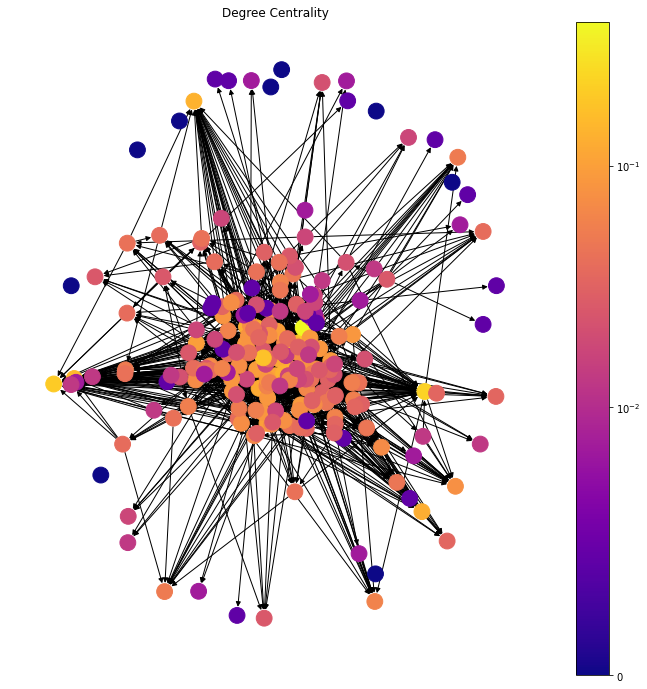

In [22]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

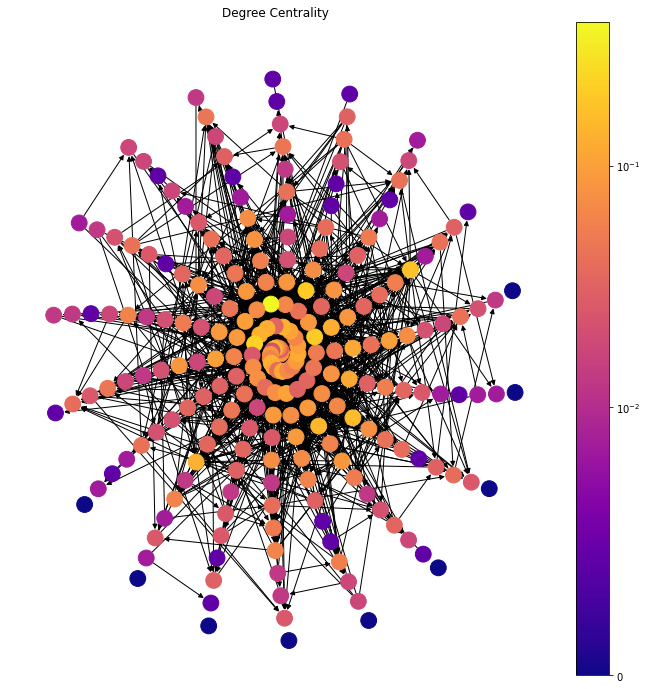

In [23]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1642: '#3173a1', 2498: '#e0802c', 2816: '#3a913a', 2914: '#c03c3d', 4038: '#9371b2', 7787: '#835b53', 8614: '#d584bc', 8700: '#7f7f7f', 8753: '#a8a935', 9206: '#2dabb8'}


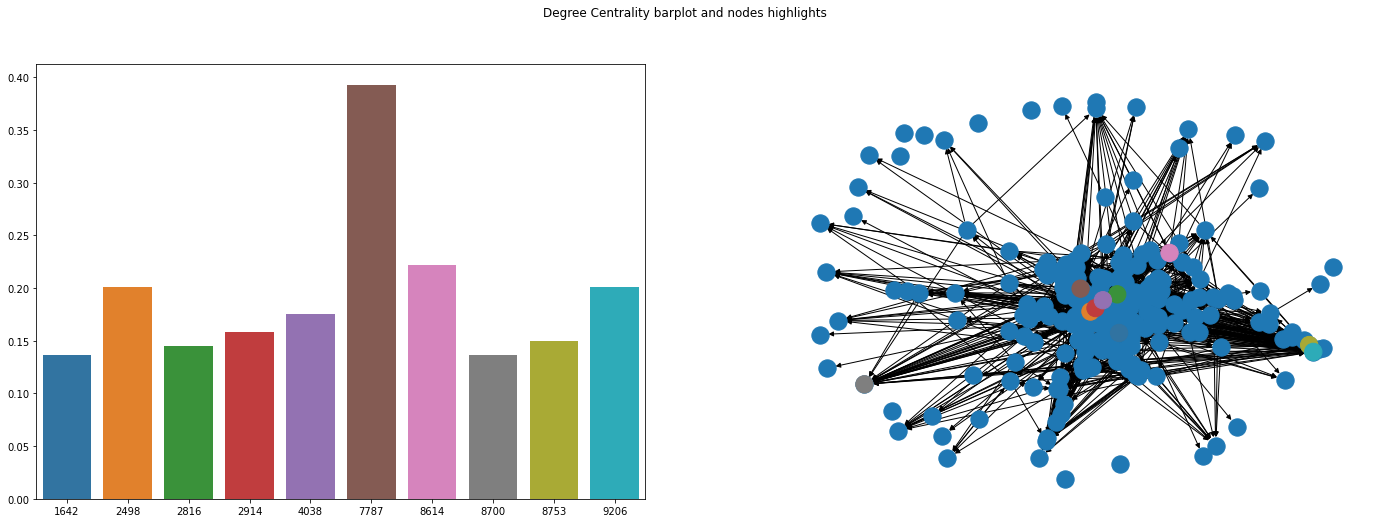

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [24]:
dizionario_colori = barplot_nodes(graph,degree, "Degree")

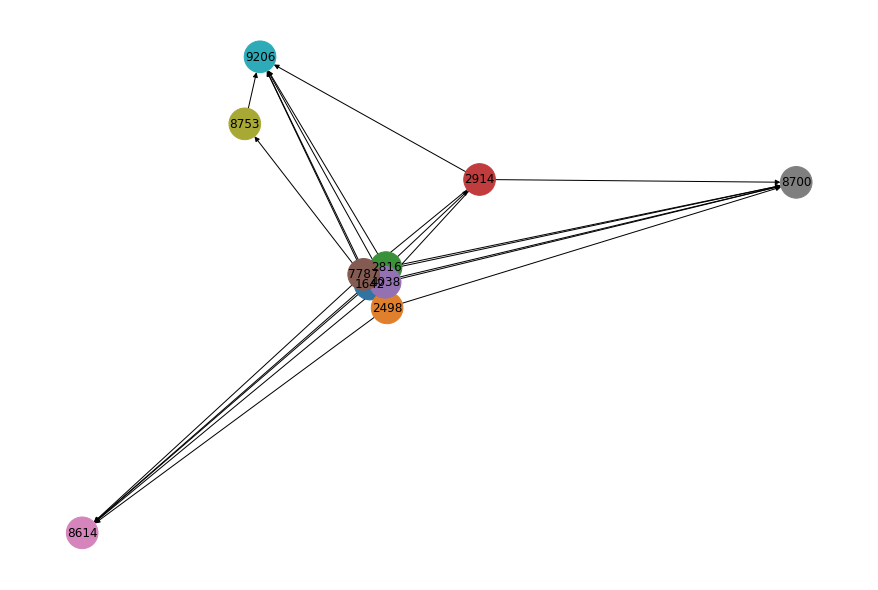

In [25]:
important_node_centrality_plot(degree, df_edge, dizionario_colori)

Betweenness Centrality

<Figure size 1080x720 with 0 Axes>

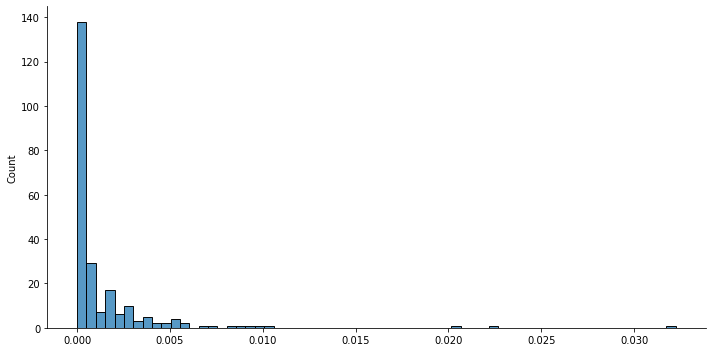

In [26]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

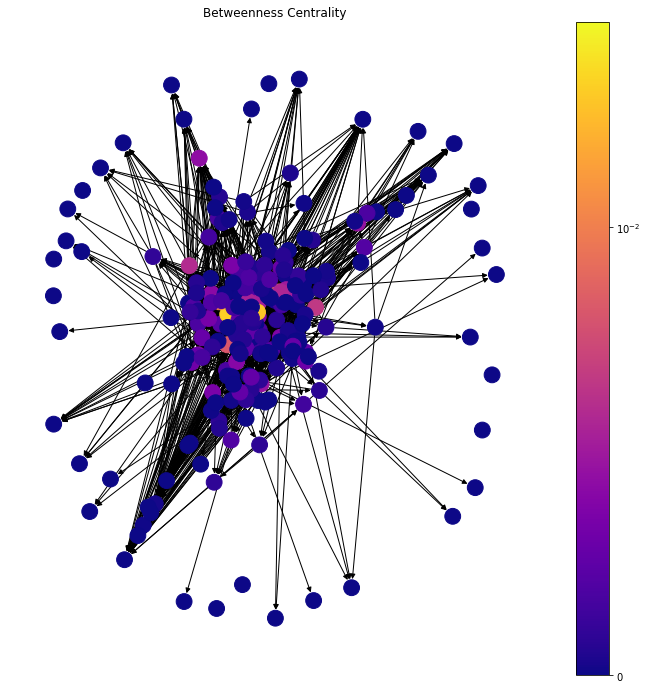

In [27]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

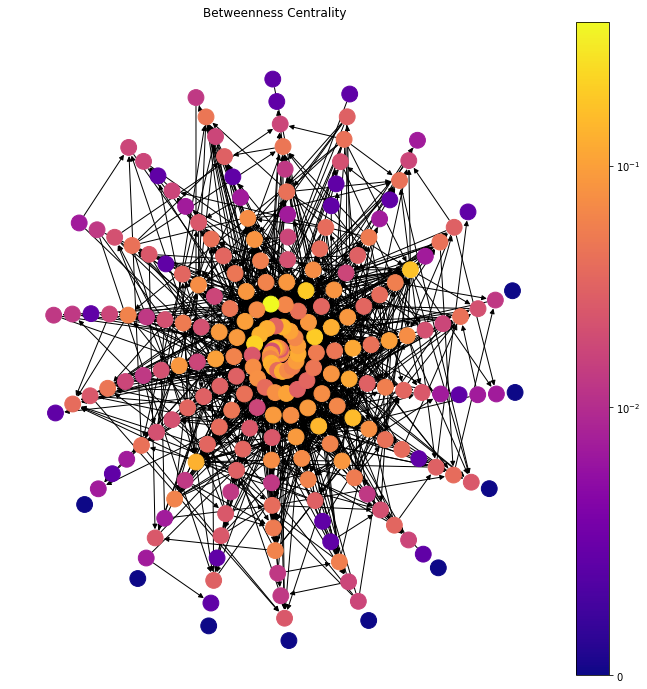

In [28]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{2498: '#3173a1', 2914: '#e0802c', 3617: '#3a913a', 3828: '#c03c3d', 4038: '#9371b2', 4042: '#835b53', 4500: '#d584bc', 4538: '#7f7f7f', 7521: '#a8a935', 7787: '#2dabb8'}


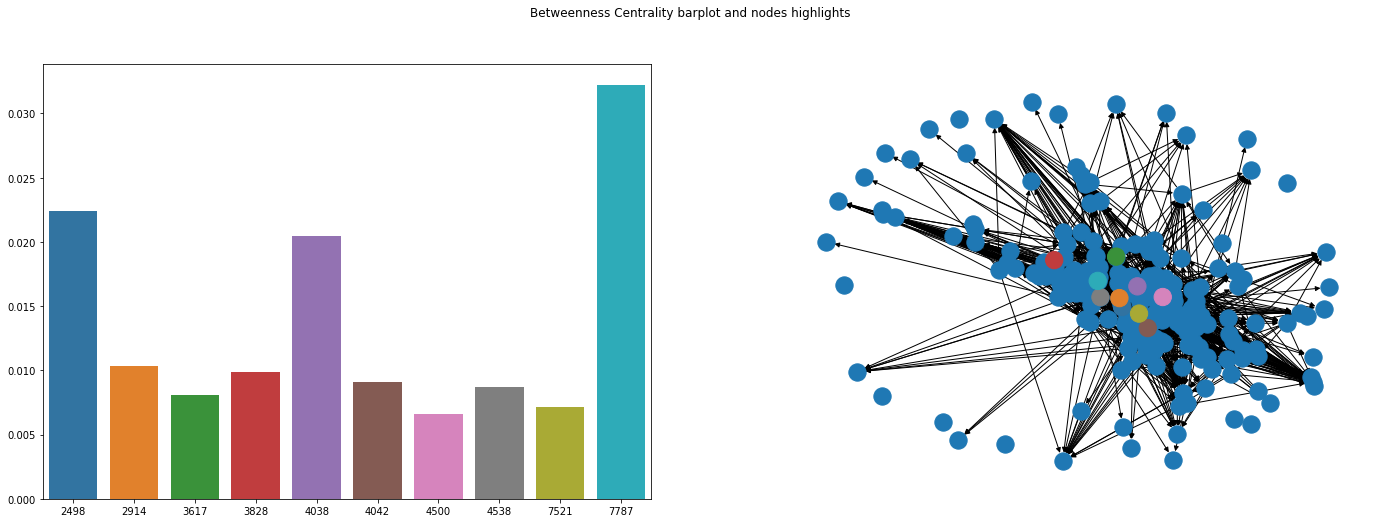

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [29]:
dizionario_colori = barplot_nodes(graph,bet, "Betweenness")

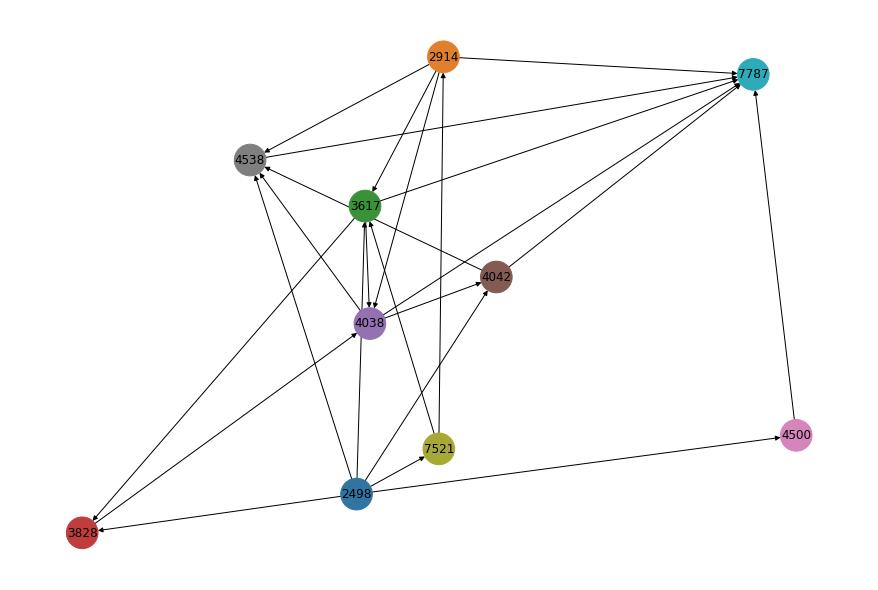

In [30]:
important_node_centrality_plot(bet, df_edge, dizionario_colori)

Closeness Centrality

<Figure size 1080x720 with 0 Axes>

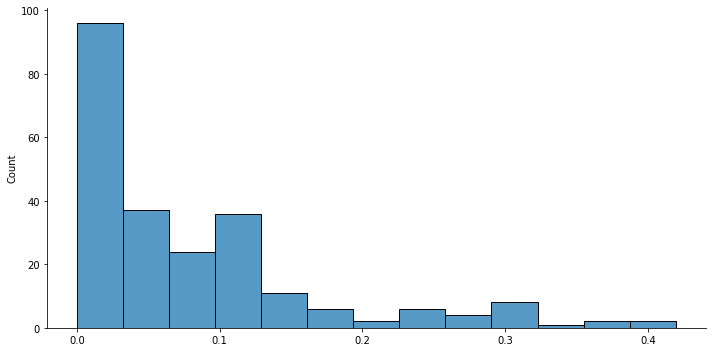

In [31]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

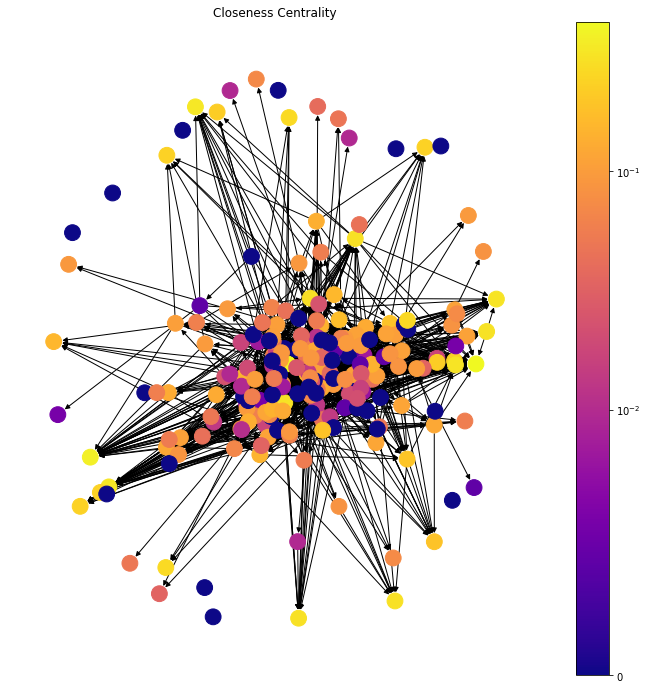

In [32]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

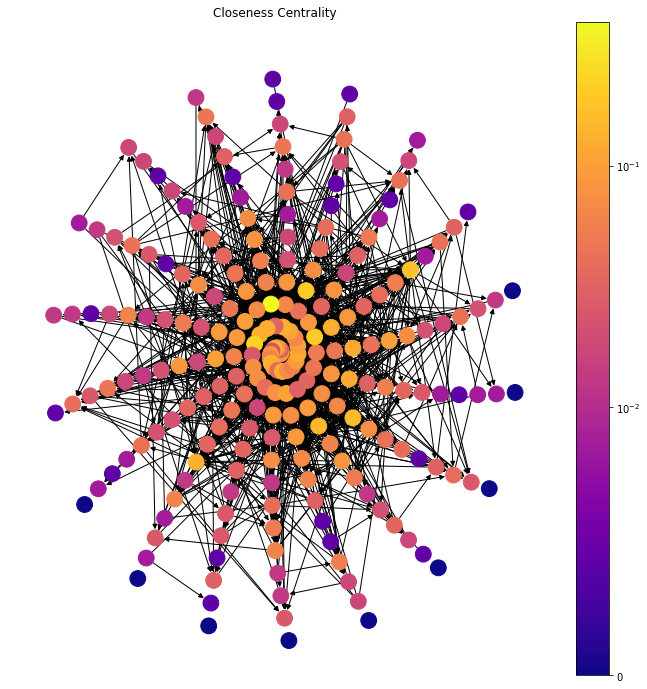

In [33]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{4527: '#3173a1', 7397: '#e0802c', 7720: '#3a913a', 7787: '#c03c3d', 8127: '#9371b2', 8554: '#835b53', 8614: '#d584bc', 8700: '#7f7f7f', 8753: '#a8a935', 9206: '#2dabb8'}


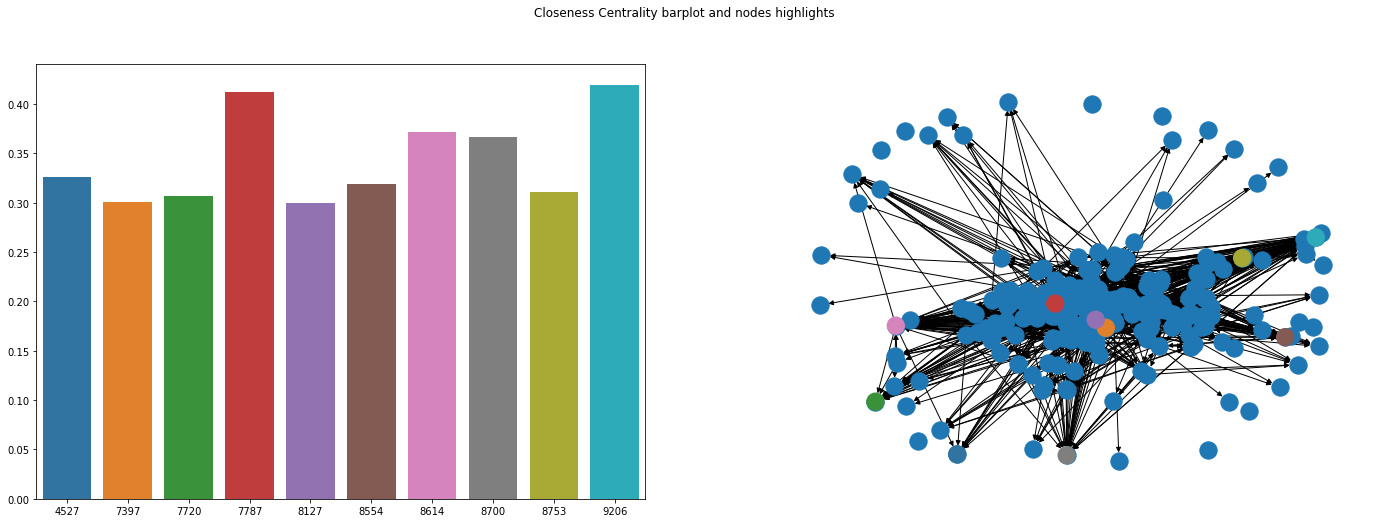

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [34]:
dizionario_colori = barplot_nodes(graph,clos, "Closeness")

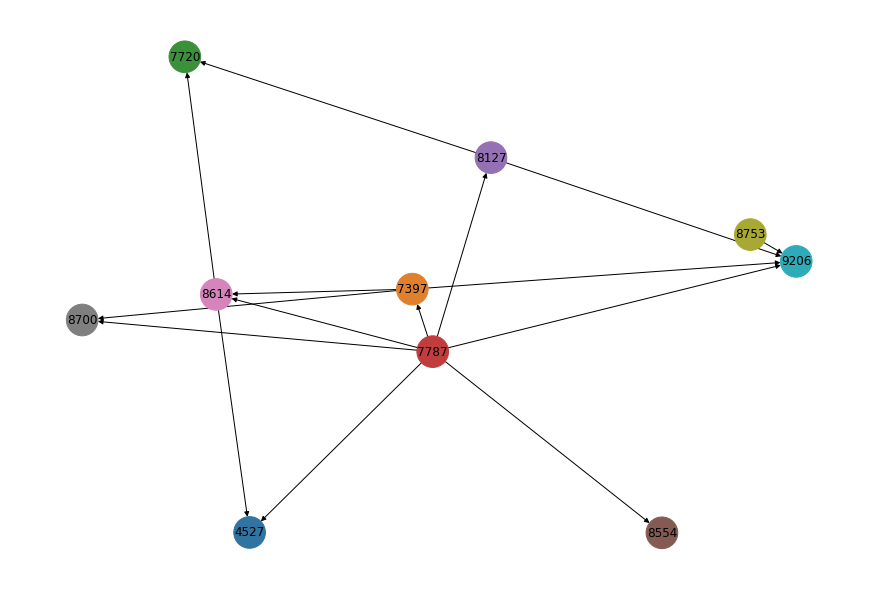

In [35]:
important_node_centrality_plot(clos, df_edge, dizionario_colori)

Eigenvector Centrality

C:\Users\mat98\AppData\Local\Temp\ipykernel_18556\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

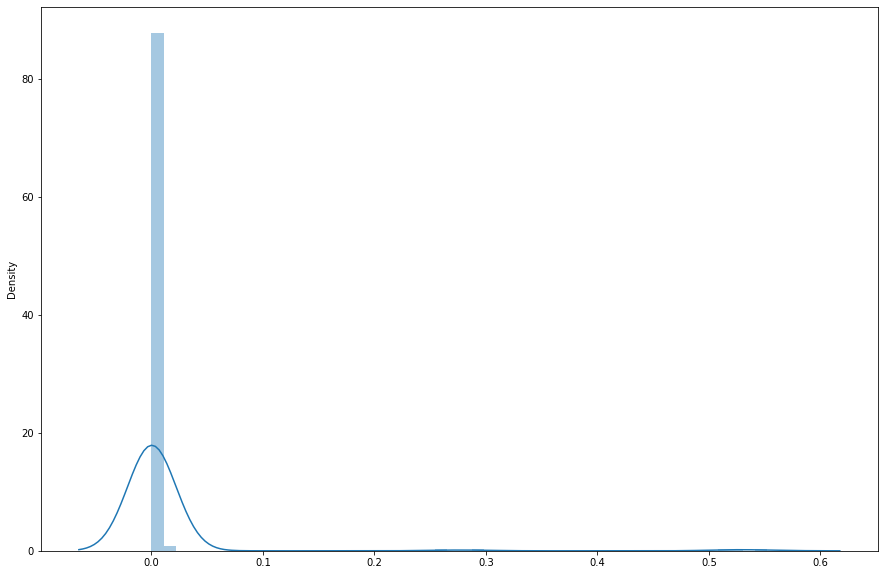

In [36]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

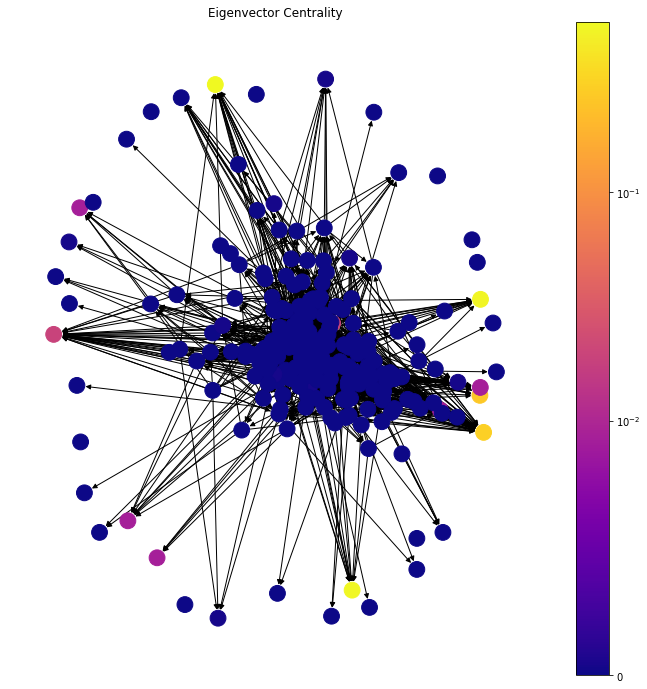

In [37]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

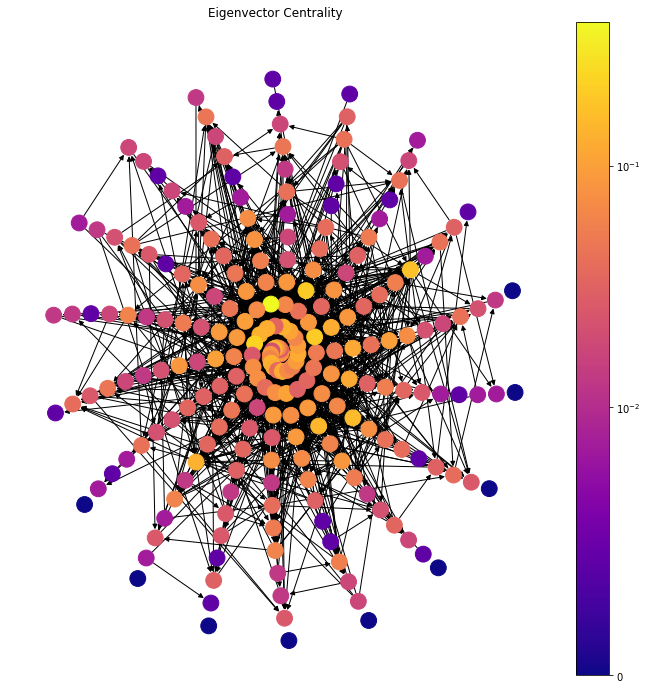

In [38]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{3834: '#3173a1', 4527: '#e0802c', 7720: '#3a913a', 8614: '#c03c3d', 8700: '#9371b2', 8753: '#835b53', 9118: '#d584bc', 9187: '#7f7f7f', 9206: '#a8a935', 9241: '#2dabb8'}


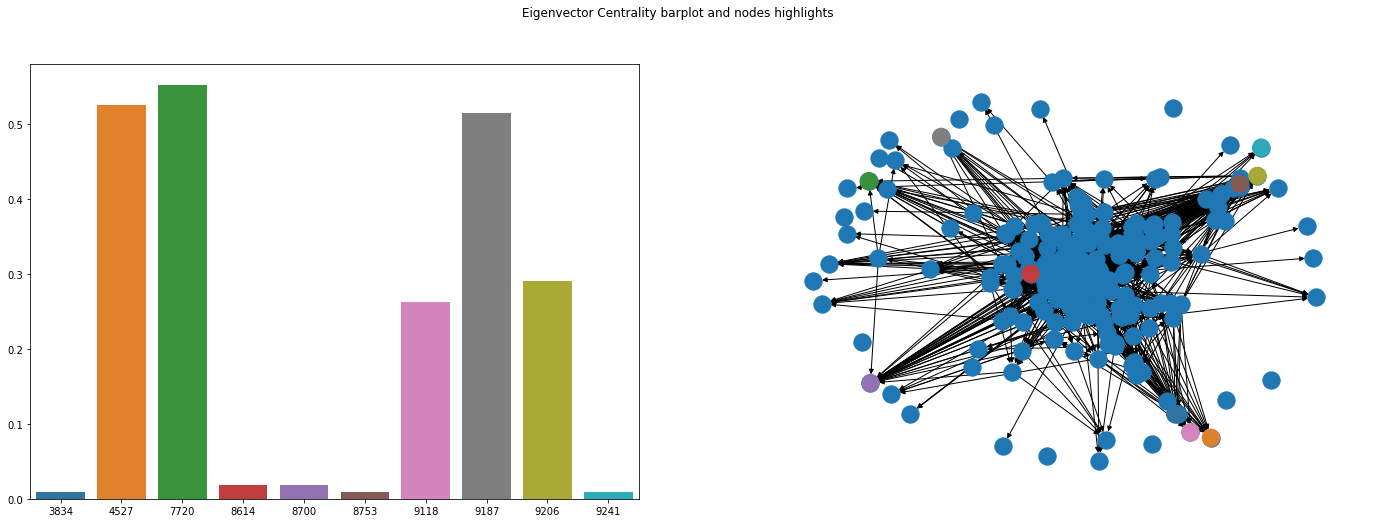

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [39]:
dizionario_colori = barplot_nodes(graph,eigv, "Eigenvector")

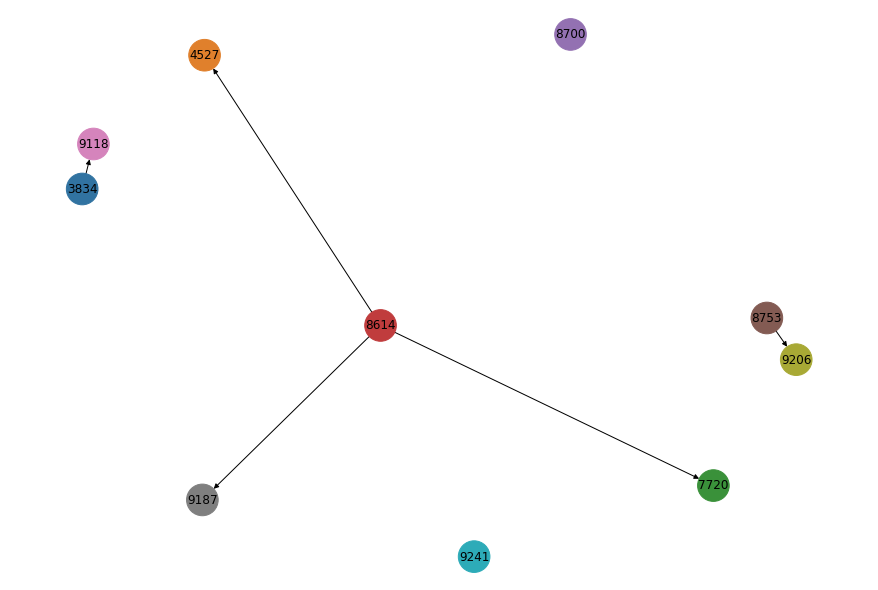

In [40]:
important_node_centrality_plot(eigv, df_edge, dizionario_colori)

PageRank

<Figure size 1080x720 with 0 Axes>

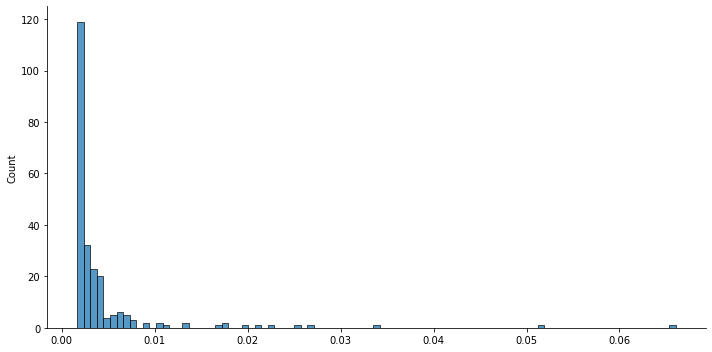

In [41]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

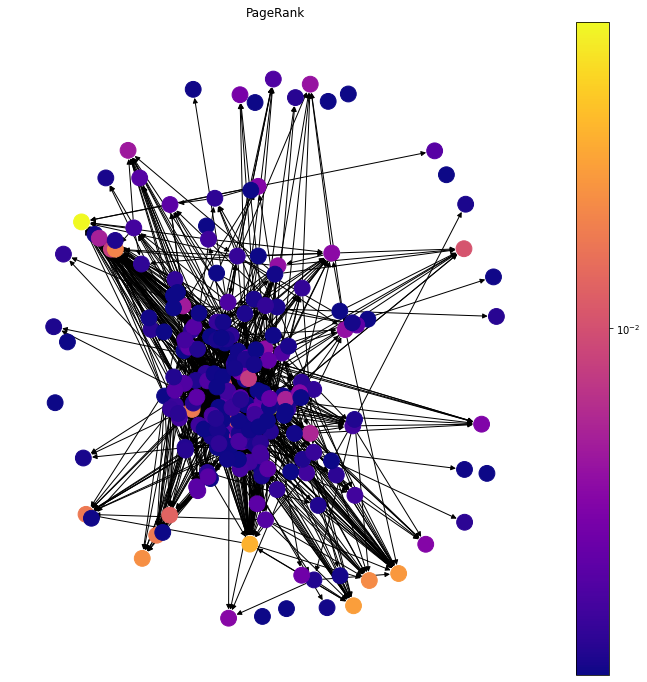

In [42]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

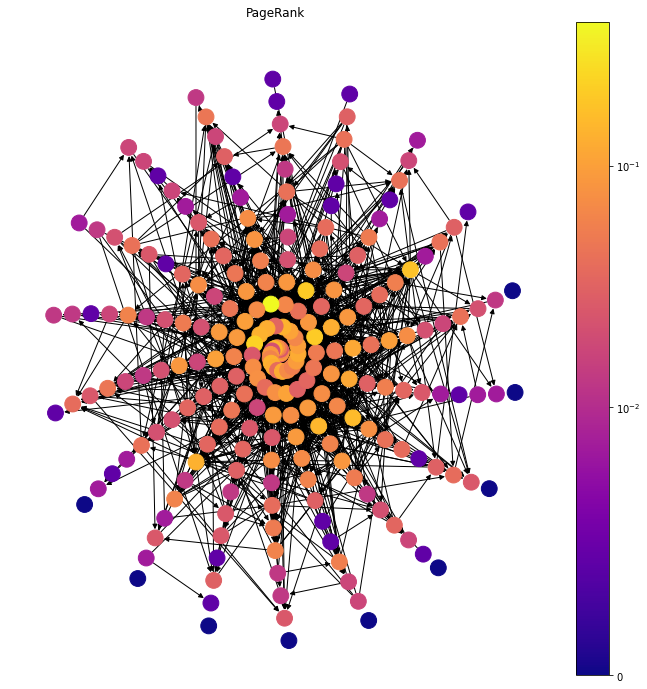

In [43]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{4527: '#3173a1', 7720: '#e0802c', 7787: '#3a913a', 7913: '#c03c3d', 8554: '#9371b2', 8614: '#835b53', 8700: '#d584bc', 8753: '#7f7f7f', 9118: '#a8a935', 9206: '#2dabb8'}


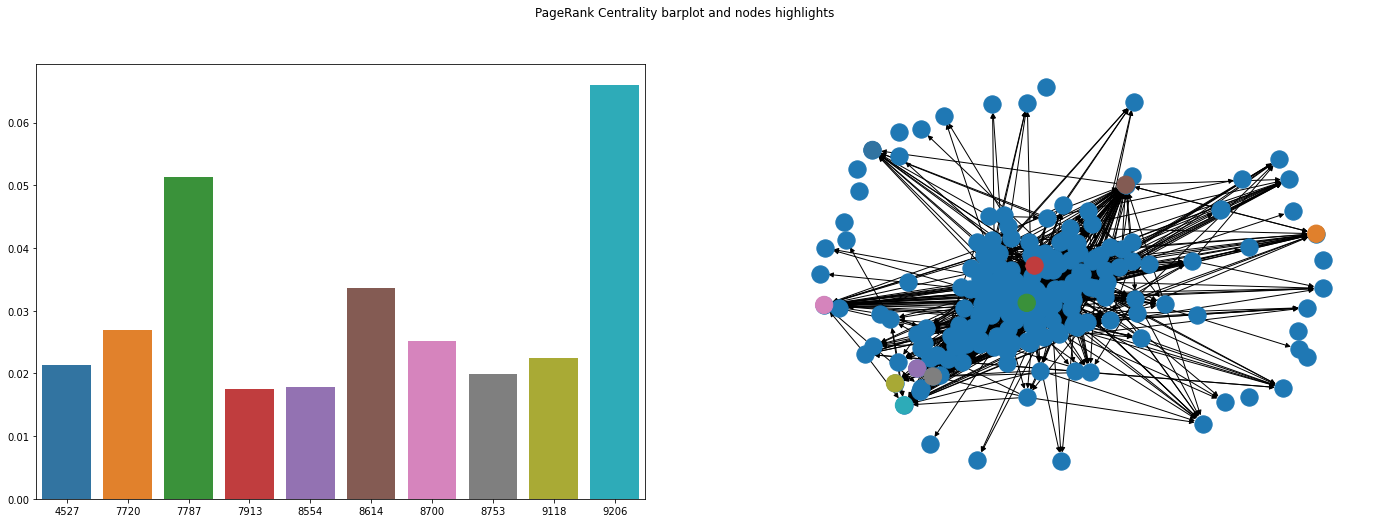

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [44]:
dizionario_colori = barplot_nodes(graph, pager, "PageRank")

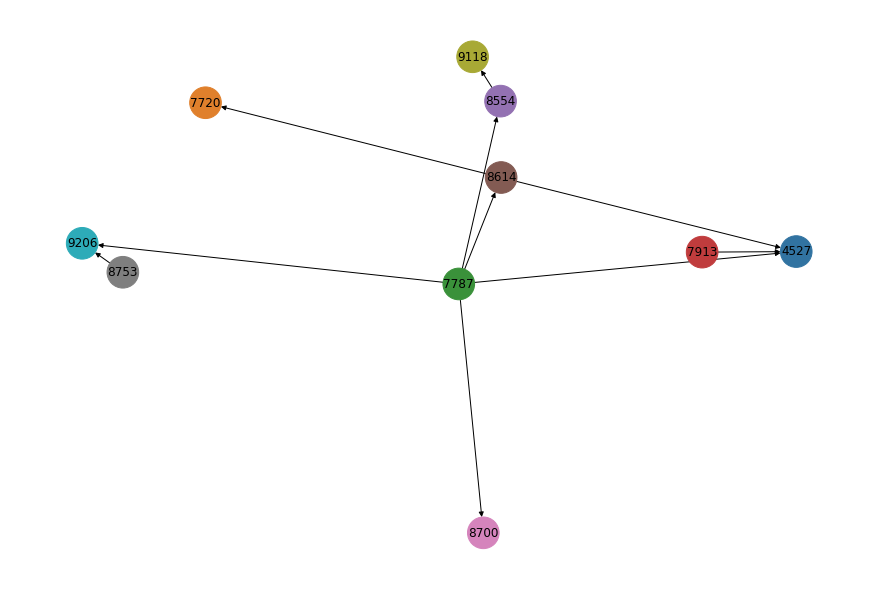

In [45]:
important_node_centrality_plot(pager, df_edge, dizionario_colori)

### Analisi delle strutture

Communites

In [46]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)

In [47]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph,dizionario,k):
    plt.figure(figsize=(12,10))
    #fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
    plt.suptitle('Community '+str(k+1))
    colors = sns.color_palette('pastel')[0:5]
    #ax1.pie([dizionario["mature"],dizionario["not_mature"]], labels = ["Mature","Not Mature"], colors = ["#FF7514","#008f39"], autopct='%.0f%%')
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario["colors"].keys()), node_color=list(dizionario["colors"].values()))\
       .set_edgecolor('k') 

In [48]:
dictionary = {}
k=0
mature_color="#008f39"
not_mature_color="#008f39"
for c in communities:
    mature = 0
    not_mature = 0
    supp_dic={}
    supp_dic_2 = {}
    supp_list=[]
    views = []
    total_views=0
    for el in c:
        node = df_target[df_target["new_id"]==el]
        total_views += int(node["views"])
        views.append(int(node["views"]))
        if node["mature"].bool(): 
            supp_dic[el]=mature_color
            mature+=1
        else:
            supp_dic[el]=not_mature_color
            not_mature+=1
    supp_dic_2["colors"] = supp_dic
    supp_dic_2["mature"] = mature
    supp_dic_2["not_mature"] = not_mature
    supp_dic_2["mean_views"] = round(total_views/len(c),2)
    supp_dic_2["dev_standard_views"] = np.std(views)
    print(supp_dic_2["dev_standard_views"])
    dictionary[k] = supp_dic_2
    k+=1



4929029.651987642
4249443.552755175
7472114.236142561
18505442.104992162
371057.497153743
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


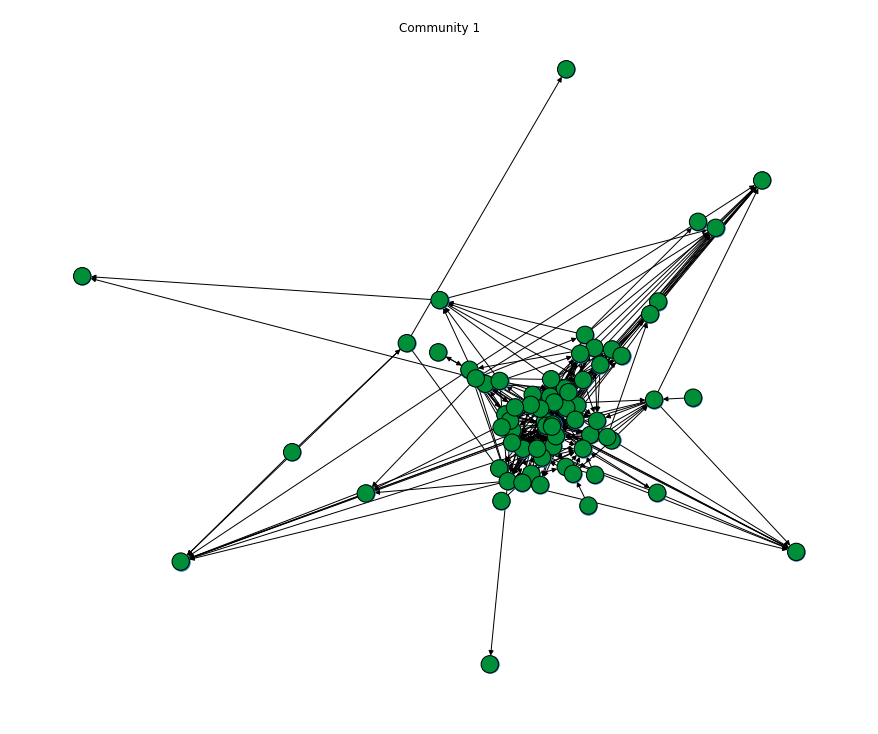

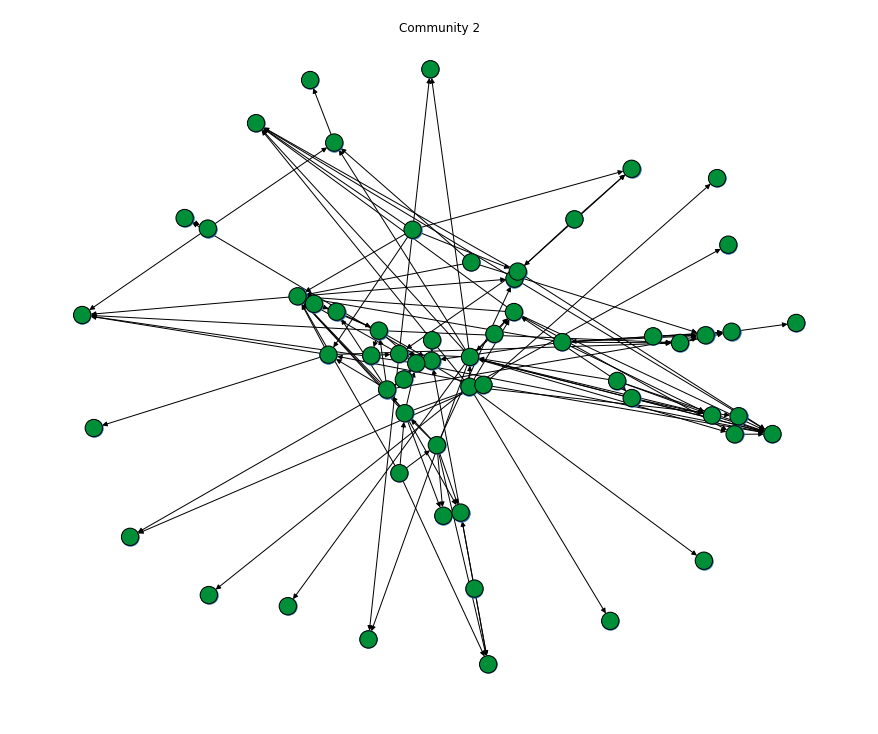

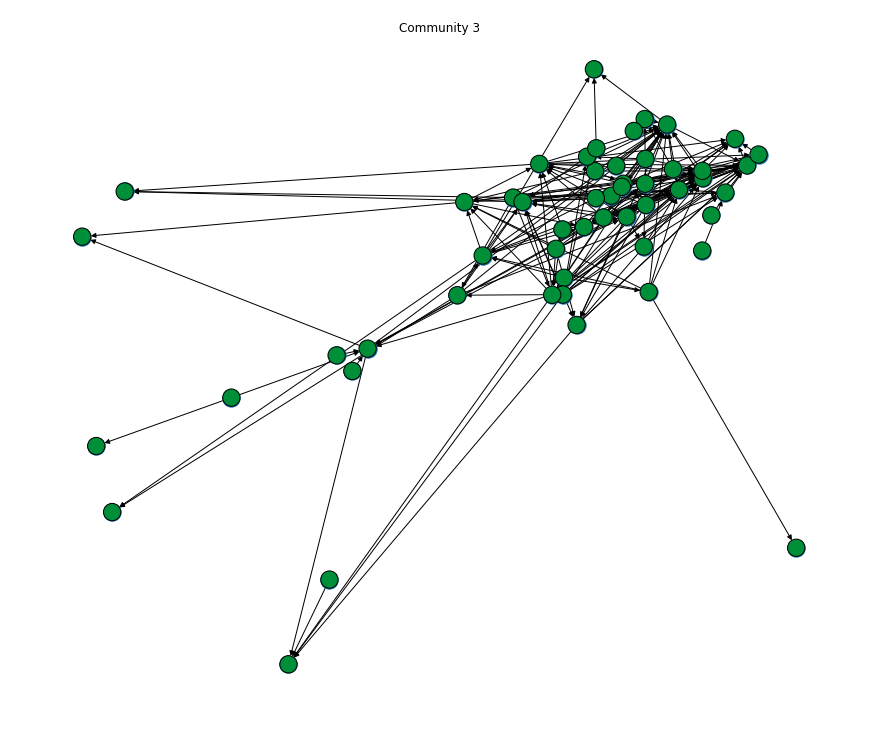

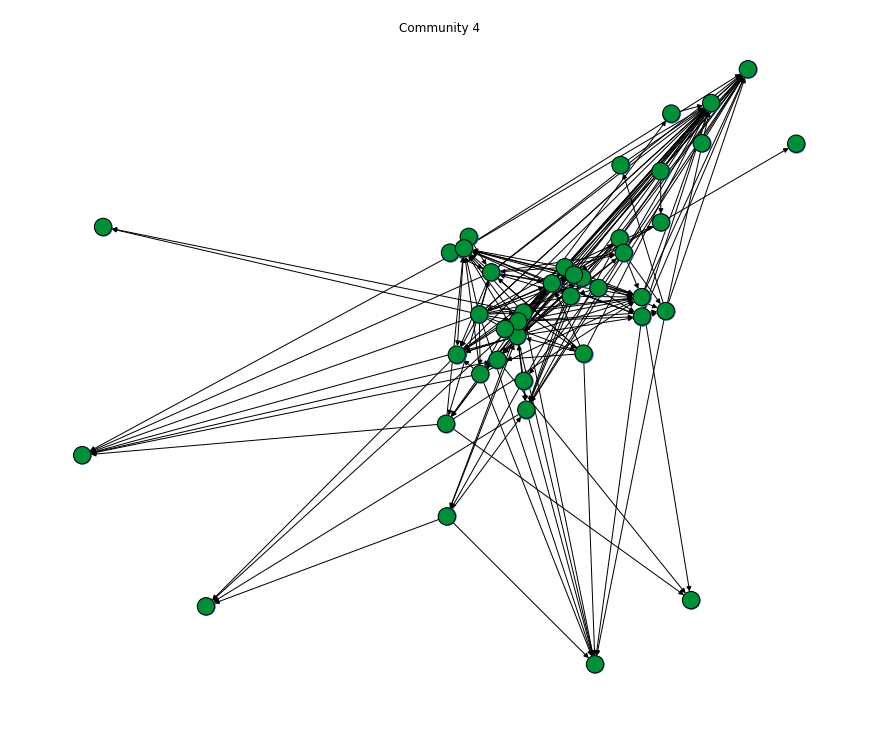

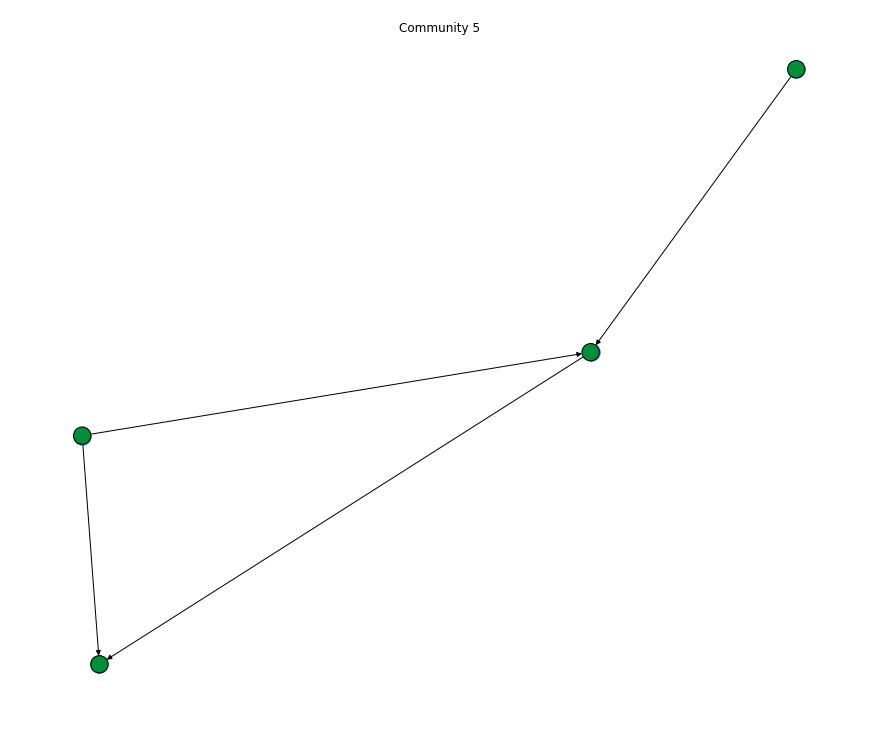

In [49]:
k=0
mean_views = []
dev_standard_views = []
list_communites = []
for c in communities:
    if len(c) == 1:
        continue
    edges = caricamento(c)
    visualizza(grafo(c, edges),dictionary[k],k)
    mean_views.append(dictionary[k]["mean_views"])
    dev_standard_views.append(dictionary[k]["dev_standard_views"])
    list_communites.append("Community "+str(k+1))
    k+=1

[4929029.651987642, 4249443.552755175, 7472114.236142561, 18505442.104992162, 371057.497153743]


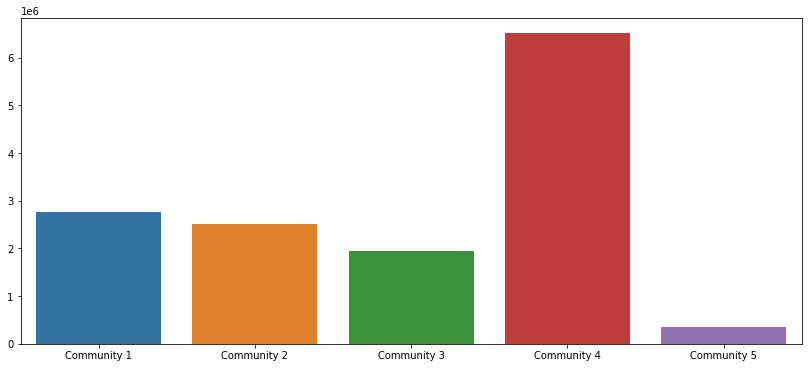

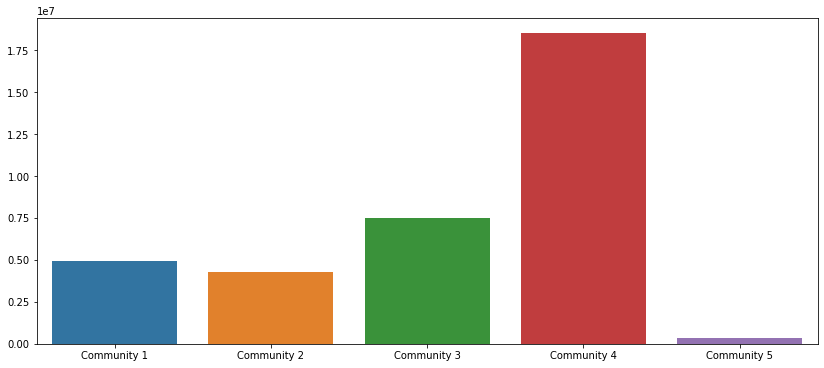

In [50]:
plt.figure(figsize=(len(communities), 6))
sns.barplot(x=list_communites,y= mean_views)
plt.figure(figsize=(len(communities), 6))
sns.barplot(x=list_communites,y= dev_standard_views)
print(dev_standard_views)

Triadi

In [51]:
def trova_triadi(grafo):
  triadi = {}
  for nodes in combinations(grafo.nodes, 3):
    n_edges = grafo.subgraph(nodes).number_of_edges()
    triadi.setdefault(n_edges, []).append(nodes)
  return(triadi)

In [52]:
triadi = trova_triadi(graph)
print('Triadi del grafo totale: ' + str(len(triadi[1])))

Triadi del grafo totale: 250630


In [53]:
count = 1
print('Triadi per community')
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    triadi = trova_triadi(community_graph)
    if not 1 in triadi:
        continue
    print("Community " + str(count) + " : " + str(len(triadi[1])))
    count = count + 1

Triadi per community
Community 1 : 13008
Community 2 : 5777
Community 3 : 6197
Community 4 : 3768
Community 5 : 1


Clique

In [54]:
#Codice per trovare le Clique
max = 0
max_clique = []
cliques = nx.find_cliques(graph.to_undirected())
for clique in cliques:
    if max < len(clique):
        max = len(clique)
        max_clique = clique
print(max)
print(max_clique)

8
[3834, 8554, 3340, 5158, 328, 7036, 4965, 9118]


K-core

In [55]:
#Codice per trovare K-core
# Calcolo del k-core del grafo (nel caso specifico, k = 3)
k = 3
k_core = nx.k_core(graph, k)
print('k-core con k=3')
print(list(k_core.nodes()))

k_core = nx.k_core(graph)
print('k-core: Main core')
print(list(k_core.nodes()))

k-core con k=3
[11, 2867, 4500, 2234, 5264, 8630, 5834, 8753, 5208, 7127, 27, 8700, 4538, 2064, 617, 5358, 189, 8723, 7208, 7398, 4918, 6418, 1642, 128, 3617, 7913, 8614, 8425, 3363, 7521, 5706, 7720, 4042, 266, 8174, 7525, 3023, 2498, 4121, 8013, 7280, 7787, 7036, 1550, 3663, 4965, 9164, 893, 3378, 1584, 328, 3340, 7624, 7362, 6858, 8554, 9118, 9206, 5158, 6193, 3828, 3834, 364, 1696, 3148, 7357, 6197, 7712, 4754, 2816, 8127, 6366, 3136, 1454, 1507, 7477, 387, 1326, 3114, 421, 8732, 422, 6118, 8573, 2250, 2145, 460, 9187, 2914, 7755, 654, 6926, 4026, 1358, 1641, 5798, 2243, 7397, 5954, 2716, 4686, 9156, 8360, 4588, 7524, 815, 4163, 7216, 685, 7936, 4385, 1283, 3034, 4418, 5117, 700, 5204, 504, 7749, 7884, 4451, 5769, 7958, 5203, 7527, 7980, 3637, 3352, 5687, 5950, 1025, 1028, 5089, 1235, 2492, 4527, 4421, 5326, 7784, 5421, 4038, 4136, 3264, 4452, 2523, 5576, 2452, 6451, 2982, 5287, 1763, 7788, 7286, 7619, 9241, 4530, 5145, 5178, 7046, 2944, 6522, 4347, 6984, 6987, 7536, 2356, 1094, 52

Ego Network

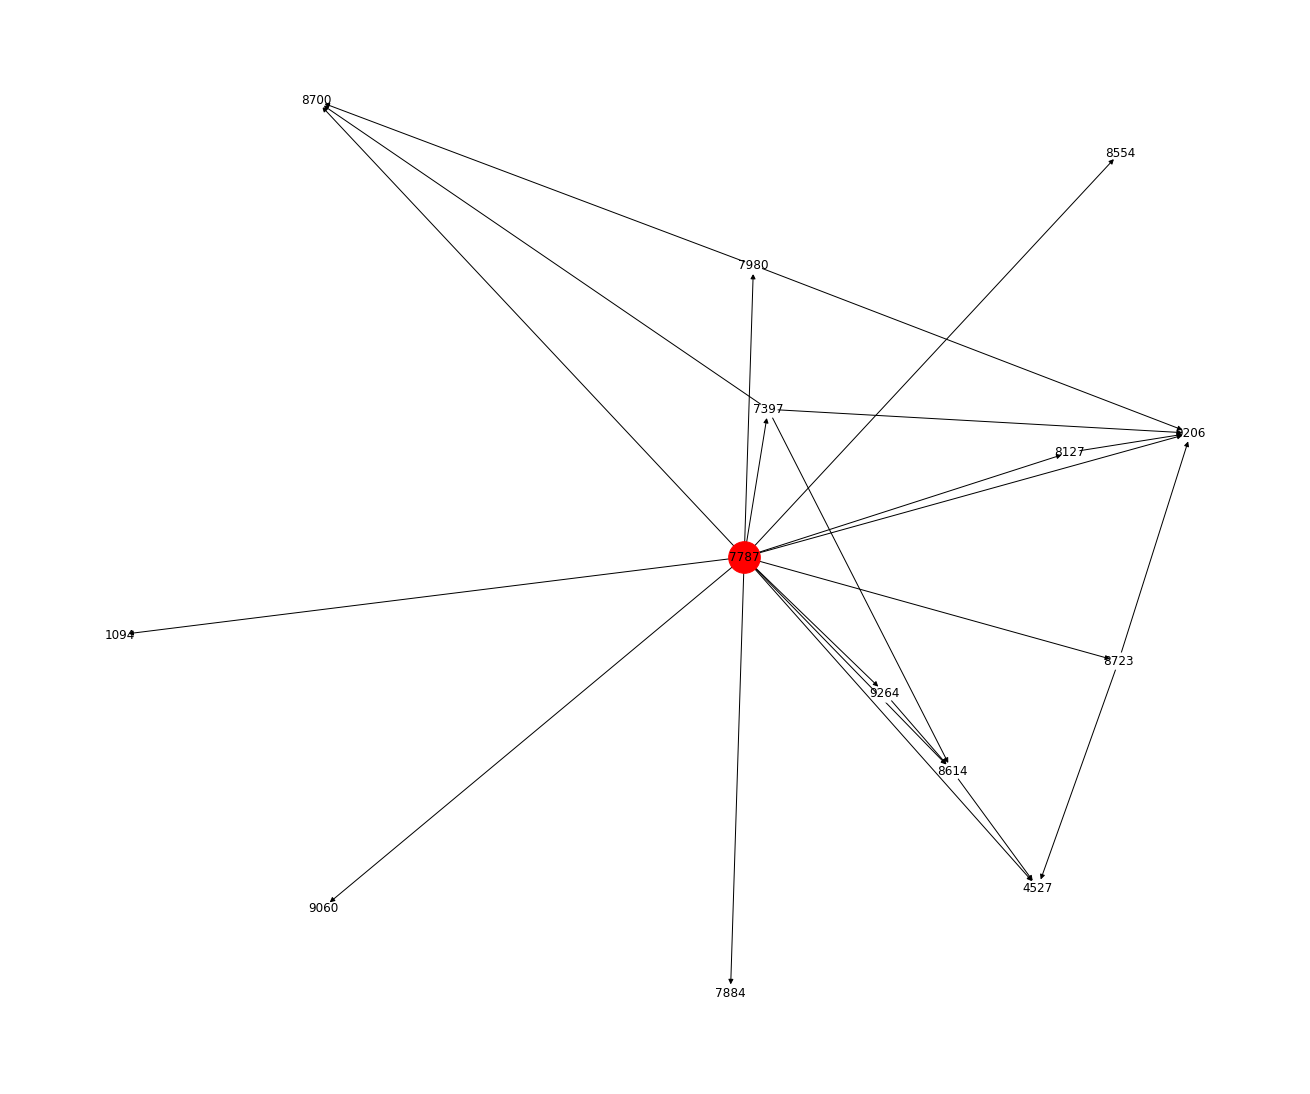

In [56]:
#Ego network della rete completa
plt.figure(figsize=(18, 15))
node_and_degree = graph.degree()
(largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Crea l'ego network dal componente principale (largest hub)
hub_ego = nx.ego_graph(graph, largest_hub)

# Plotta i nodi attorno al nodo ego
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

# Plotta il nodo ego (grande rosso)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
plt.show()

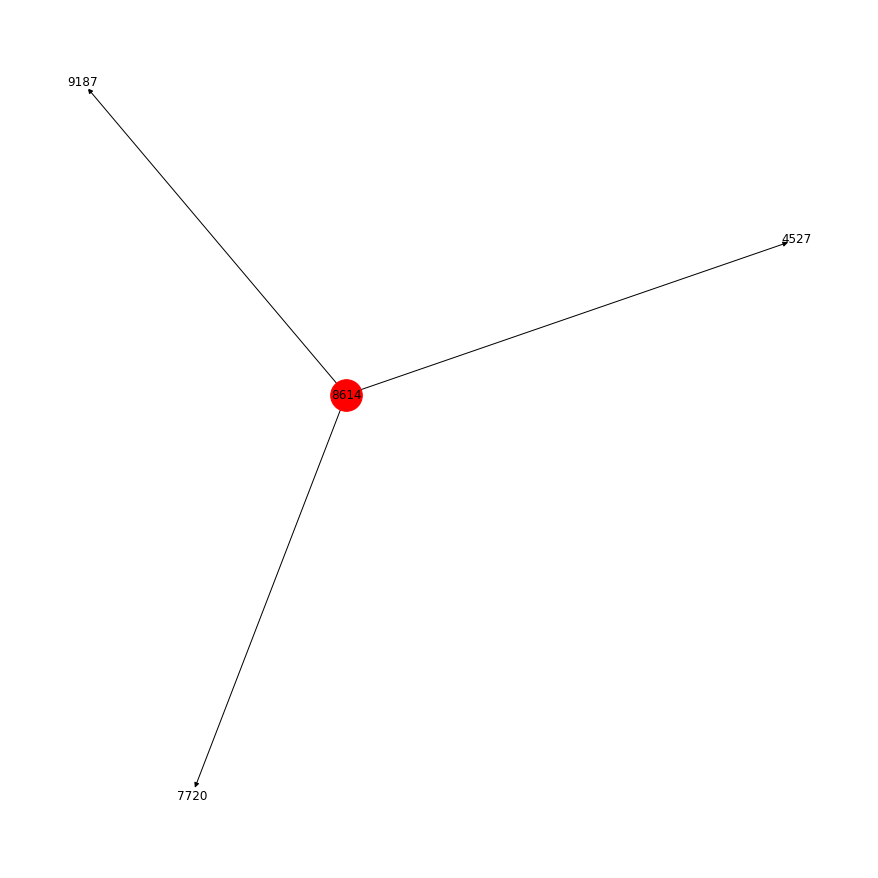

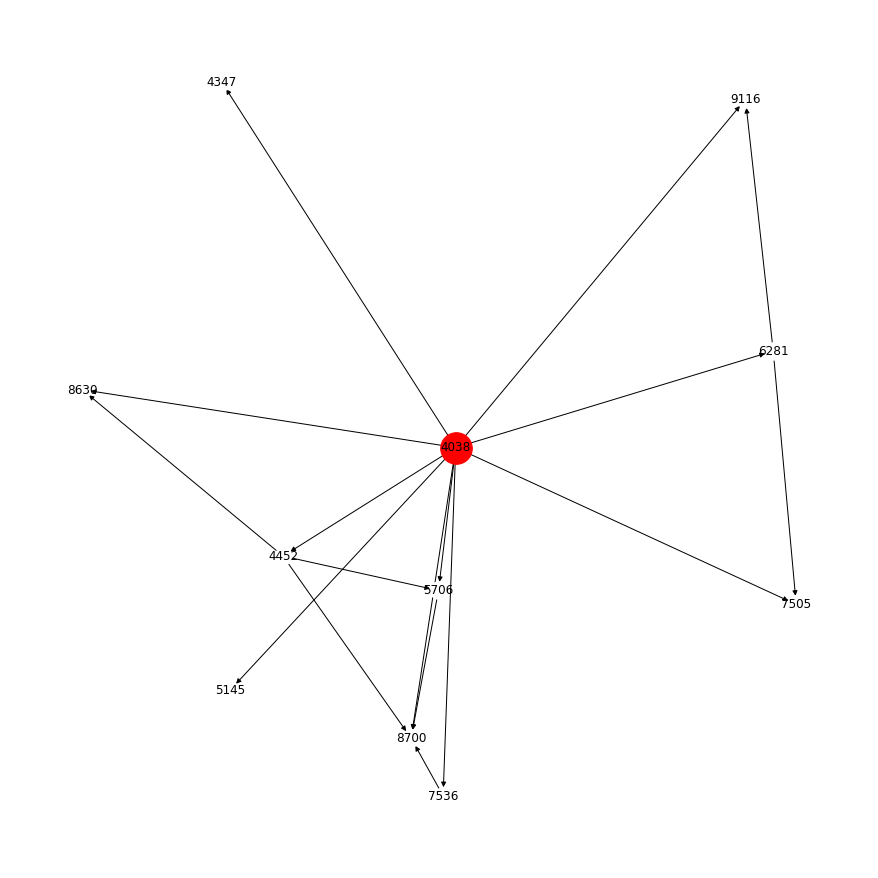

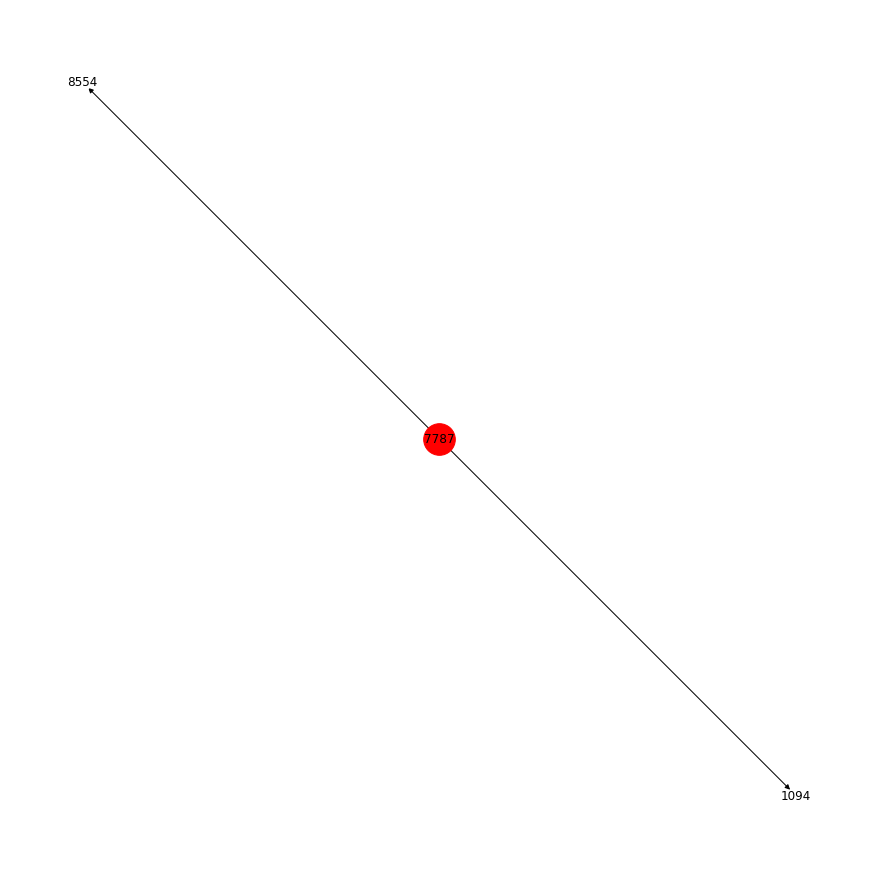

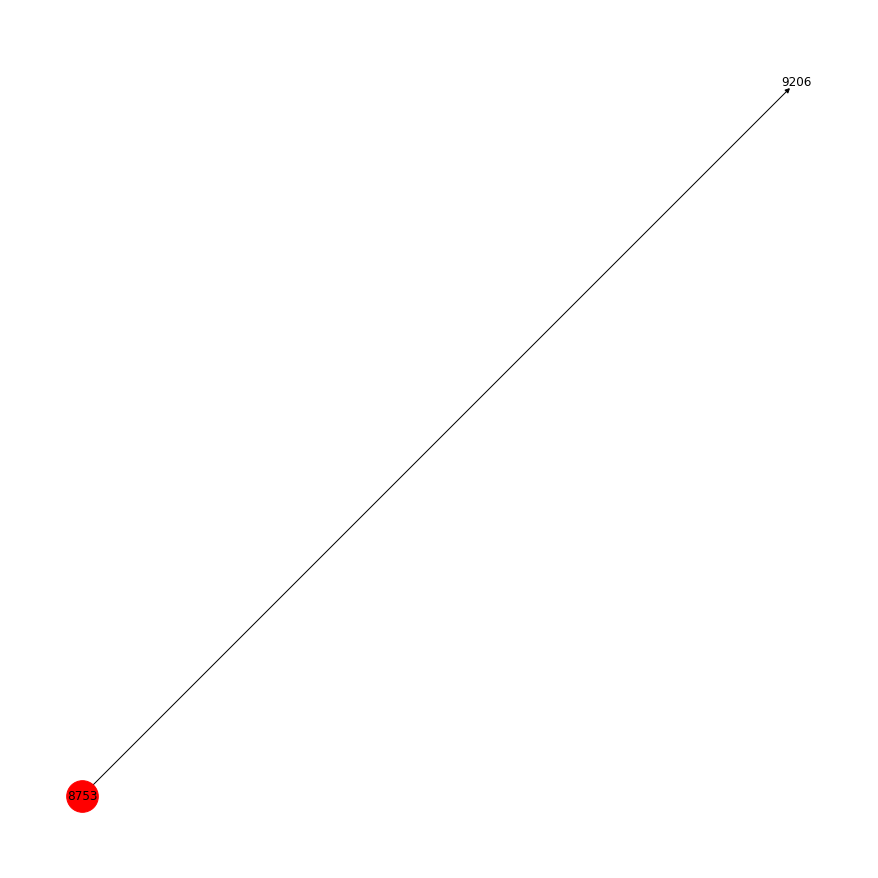

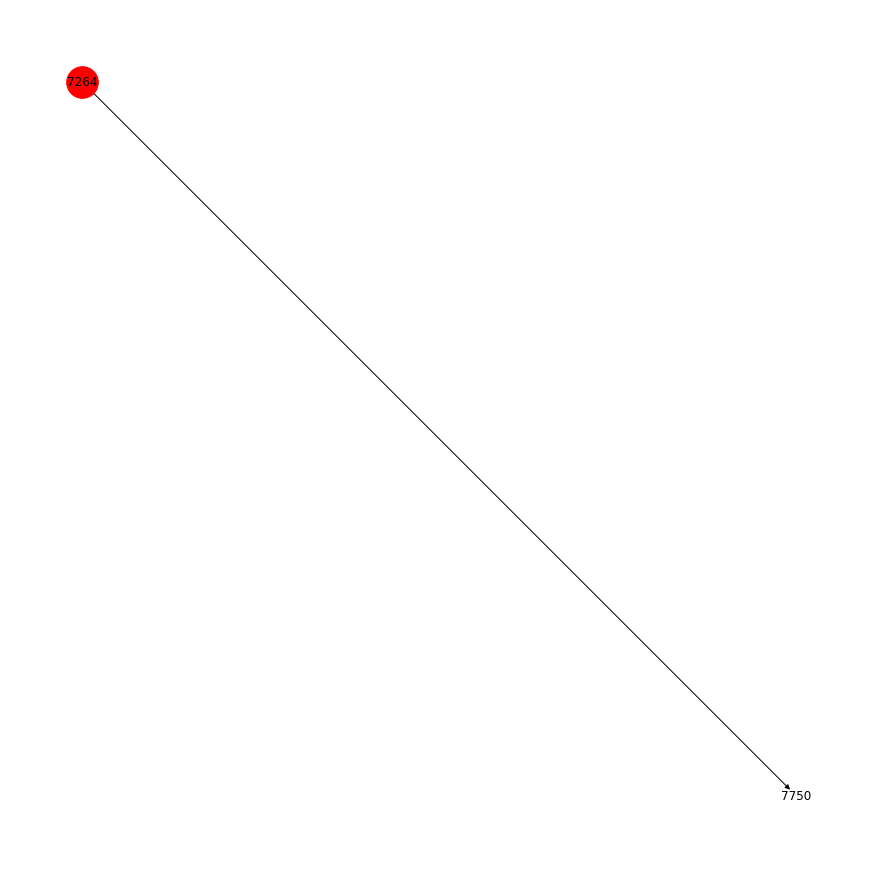

In [57]:
#Ego network delle singole community
count = 1
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    plt.figure(figsize=(12, 12))
    node_and_degree = community_graph.degree()
    (largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

    # Crea l'ego network dal componente principale (largest hub)
    hub_ego = nx.ego_graph(community_graph, largest_hub)

    # Plotta i nodi attorno al nodo ego
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

    # Plotta il nodo ego (grande rosso)
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
    plt.show()